In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML 
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [3]:
from sklearn.metrics import confusion_matrix

# TO DO ANOMALY DETECTION 
- Perform anomaly detection, 
- Data need to divide by two grouop ("Normal", "various Attack ")

In [4]:
data = pd.read_csv("ins_fraud.csv")

In [5]:
# last column is the target
# 1 = anomaly, 0 = normal
TARGET = "fraud"

features = data.drop(TARGET, axis=1)
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 0].index
train_data = x_train.loc[train_index]

In [6]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

data.drop('fraud',axis=1,inplace=True)



df_normal = data[normal_mask]
df_attack = data[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 15959
Attack count: 41


In [7]:
# Convert DataFrame into Numpy arrays, keras need numpy
x_normal = df_normal.values
x_attack = df_attack.values

## Training the Autoencoder 

In [8]:
from sklearn.model_selection import train_test_split

- important to note that we are not using the outcome column as a label to predict
- This anomaly detection is unsupervised
- **no target (y)**
- train an autoencoder on the normal data 
- see how well it can detect that the data not flagged as "normal" represents an anomaly

In [9]:
x_normal_train, x_normal_test = train_test_split(
    x_normal, test_size=0.3, random_state=77)

In [10]:
print(f"Normal train count: {len(x_normal_train)}")
print(f"Normal test count: {len(x_normal_test)}")

Normal train count: 11171
Normal test count: 4788


# How to learn?

- The autoencoder will learn to compress the data to a vector of just three numbers
- autoencoder should be able to also decompress with reasonable accuracy

In [11]:
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [12]:
model = AutoEncoder(output_units=x_normal_train.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_normal_train,
    x_normal_train,
    epochs=100,
    batch_size=512,
    validation_data=(x_normal_test, x_normal_test)
)

Epoch 1/100
22/22 [==============================] - 1s 10ms/step - loss: 7.6576 - mse: 423447166976.0000 - val_loss: 7.5557 - val_mse: 493758545920.0000
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 7.5135 - mse: 423447265280.0000 - val_loss: 7.4719 - val_mse: 493758545920.0000
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 7.4586 - mse: 423447265280.0000 - val_loss: 7.4408 - val_mse: 493758545920.0000
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 7.4273 - mse: 423447199744.0000 - val_loss: 7.4231 - val_mse: 493758545920.0000
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 7.4104 - mse: 423447298048.0000 - val_loss: 7.4187 - val_mse: 493758545920.0000
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 7.4007 - mse: 423447166976.0000 - val_loss: 7.4123 - val_mse: 493758545920.0000
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 7.3923 -

22/22 [==============================] - 0s 4ms/step - loss: 7.4440 - mse: 423447265280.0000 - val_loss: 7.4744 - val_mse: 493758545920.0000
Epoch 55/100
22/22 [==============================] - 0s 4ms/step - loss: 7.4345 - mse: 423447265280.0000 - val_loss: 7.4742 - val_mse: 493758545920.0000
Epoch 56/100
22/22 [==============================] - 0s 4ms/step - loss: 7.4352 - mse: 423447199744.0000 - val_loss: 7.4743 - val_mse: 493758545920.0000
Epoch 57/100
22/22 [==============================] - 0s 3ms/step - loss: 7.4353 - mse: 423447199744.0000 - val_loss: 7.4744 - val_mse: 493758545920.0000
Epoch 58/100
22/22 [==============================] - 0s 4ms/step - loss: 7.4359 - mse: 423447265280.0000 - val_loss: 7.4748 - val_mse: 493758545920.0000
Epoch 59/100
22/22 [==============================] - 0s 4ms/step - loss: 7.4359 - mse: 423447265280.0000 - val_loss: 7.4751 - val_mse: 493758545920.0000
Epoch 60/100
22/22 [==============================] - 0s 4ms/step - loss: 7.4376 - mse: 4

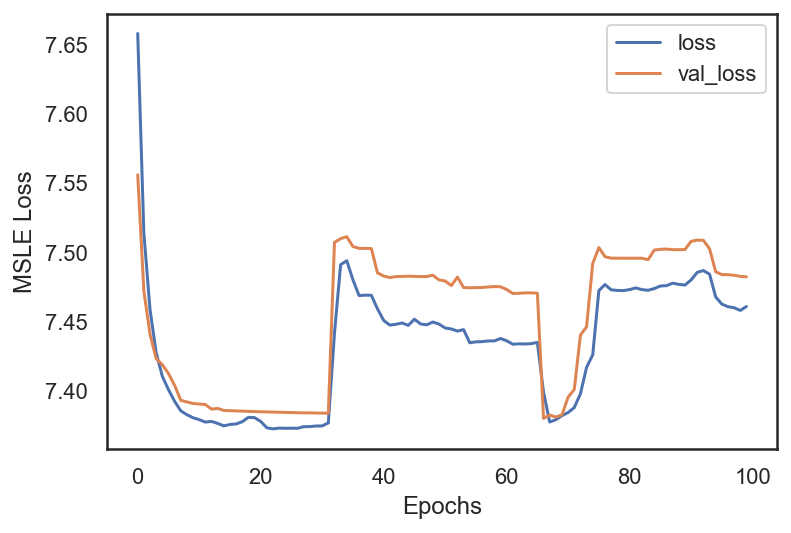

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

# Detecting an Anomaly 

- encoding data that represents an attack. This higher error indicates an anomaly.

In [14]:
pred = model.predict(x_normal_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_normal_test))
pred = model.predict(x_normal)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_normal))
pred = model.predict(x_attack)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_attack))
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Anormal Data (RMSE): {score3}")

Out of Sample Normal Score (RMSE): 702679.5540404909
Insample Normal Score (RMSE): 666739.7863877318
Anormal Data (RMSE): 586363.0034770189


In [15]:
def find_threshold(model, x_train):
  reconstructions = model.predict(x_train)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test, threshold):
  predictions = model.predict(x_test)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

In [16]:
threshold = find_threshold(model, x_normal_train)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, x_test, threshold)
accuracy_score(y_test, predictions)

Threshold: 12.863562743210668


0.7771875

In [17]:
confusion_matrix(y_test, predictions)

array([[2484,  708],
       [   5,    3]])

In [18]:
# 한개 맞췄당 

# Autoencoder Scaled

In [19]:
data = pd.read_csv("ins_fraud.csv")

In [20]:
x_normal = data[data["fraud"]==0].values
x_attack = data[data["fraud"]==1].values

In [21]:
# last column is the target
# 0 = anomaly, 1 = normal
TARGET = "fraud"

features = data.drop(TARGET, axis=1)
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 0].index
train_data = x_train.loc[train_index]

# min max scale the input data
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [22]:
# create a model by subclassing Model class in tensorflow

model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=100,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 0.1129 - mse: 0.1917 - val_loss: 0.1040 - val_mse: 0.1754
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0766 - mse: 0.1356 - val_loss: 0.0514 - val_mse: 0.1047
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0507 - mse: 0.1020 - val_loss: 0.0448 - val_mse: 0.0902
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0460 - mse: 0.0931 - val_loss: 0.0415 - val_mse: 0.0848
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0435 - mse: 0.0888 - val_loss: 0.0403 - val_mse: 0.0827
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0419 - mse: 0.0860 - val_loss: 0.0382 - val_mse: 0.0791
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0396 - mse: 0.0816 - val_loss: 0.0354 - val_mse: 0.0735
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0376 - m

25/25 [==============================] - 0s 3ms/step - loss: 0.0200 - mse: 0.0415 - val_loss: 0.0164 - val_mse: 0.0340
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0201 - mse: 0.0415 - val_loss: 0.0163 - val_mse: 0.0339
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0199 - mse: 0.0411 - val_loss: 0.0162 - val_mse: 0.0337
Epoch 66/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0199 - mse: 0.0412 - val_loss: 0.0162 - val_mse: 0.0335
Epoch 67/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0198 - mse: 0.0410 - val_loss: 0.0161 - val_mse: 0.0334
Epoch 68/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0197 - mse: 0.0408 - val_loss: 0.0160 - val_mse: 0.0333
Epoch 69/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0197 - mse: 0.0408 - val_loss: 0.0159 - val_mse: 0.0332
Epoch 70/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0196 - mse: 0

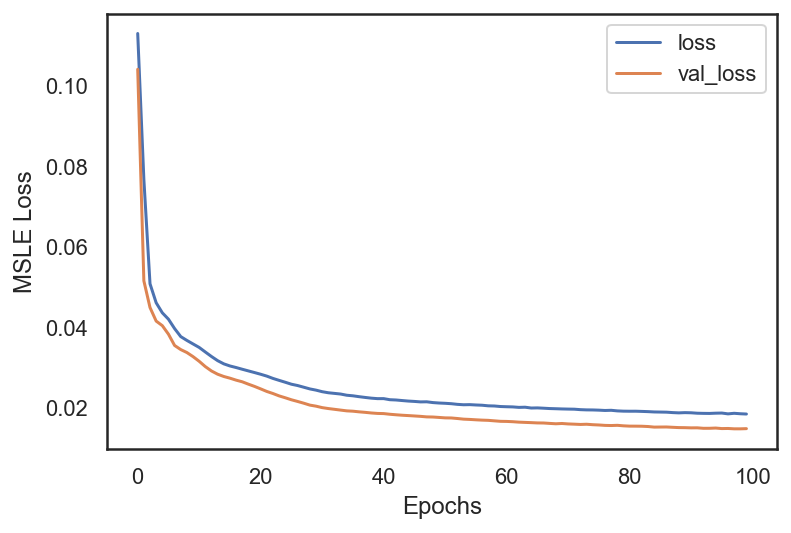

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [24]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.024881502782340525


0.8296875

In [25]:
confusion_matrix(y_test, predictions)

array([[2654,  538],
       [   7,    1]])

In [26]:
# 와아 한개 맞았당..... 

# 다시 해보기 z-score 맞춰서  

In [27]:
data = pd.read_csv("ins_fraud.csv")

In [28]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    
    data[name] = (df[name] - mean) / sd

In [29]:
val = data[data["c24"] == 1].drop("c24", 1)
data = data[data["c24"] == 0].drop("c24", 1)

In [30]:
encode_numeric_zscore(data, "c14")
encode_numeric_zscore(data, "c15")
encode_numeric_zscore(data, "c7")
encode_numeric_zscore(data, "c19")

In [31]:
data

,fraud,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,2,1,3,0,2,0,0.367910,2,0,...,-0.296576,-0.273436,1,0,0,-0.382013,0,0,0,-1
3,0,3,1,3,0,4,0,-3.009365,2,0,...,2.047547,-0.273436,3,1,0,-0.382013,0,0,0,-1
4,0,1,0,1,0,1,0,0.367910,1,0,...,0.465808,0.121305,1,0,0,0.672864,0,0,0,-1
6,1,1,1,3,0,4,0,0.367910,3,0,...,-0.548760,0.123874,0,0,0,-0.382013,1,2,1,2
8,0,2,0,4,0,4,0,-3.009365,1,0,...,-0.548760,-0.273436,1,0,0,-0.382013,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,2,0,3,1,4,0,0.367910,1,0,...,0.743176,-0.273436,0,0,0,-0.382013,0,0,0,-1
15995,0,2,0,2,0,2,0,0.367910,2,0,...,-0.548760,-0.273436,1,1,0,-0.382013,0,0,0,-1
15996,0,2,0,2,1,4,0,0.367910,1,1,...,0.648591,-0.273436,2,1,0,-0.382013,0,0,0,-1
15998,0,2,0,2,0,2,0,0.367910,2,0,...,-0.548760,-0.273436,4,1,0,-0.382013,0,0,0,-1


In [32]:
# last column is the target
# 1 = anomaly, 0 = normal
TARGET = "fraud"

features = data.drop(TARGET, axis=1)
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 0].index
train_data = x_train.loc[train_index]

# min max scale the input data
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [33]:
# create a model by subclassing Model class in tensorflow

model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=100,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/100
21/21 [==============================] - 1s 9ms/step - loss: 0.1071 - mse: 0.1819 - val_loss: 0.0872 - val_mse: 0.1493
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0663 - mse: 0.1205 - val_loss: 0.0474 - val_mse: 0.0947
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0477 - mse: 0.0948 - val_loss: 0.0420 - val_mse: 0.0838
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0439 - mse: 0.0878 - val_loss: 0.0392 - val_mse: 0.0800
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0414 - mse: 0.0836 - val_loss: 0.0375 - val_mse: 0.0771
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0395 - mse: 0.0806 - val_loss: 0.0355 - val_mse: 0.0728
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0375 - mse: 0.0765 - val_loss: 0.0330 - val_mse: 0.0681
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0354 - m

21/21 [==============================] - 0s 3ms/step - loss: 0.0187 - mse: 0.0387 - val_loss: 0.0145 - val_mse: 0.0302
Epoch 64/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0185 - mse: 0.0383 - val_loss: 0.0145 - val_mse: 0.0302
Epoch 65/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0185 - mse: 0.0383 - val_loss: 0.0145 - val_mse: 0.0300
Epoch 66/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0185 - mse: 0.0383 - val_loss: 0.0144 - val_mse: 0.0300
Epoch 67/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0380 - val_loss: 0.0143 - val_mse: 0.0297
Epoch 68/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0183 - mse: 0.0378 - val_loss: 0.0142 - val_mse: 0.0296
Epoch 69/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0380 - val_loss: 0.0142 - val_mse: 0.0296
Epoch 70/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0182 - mse: 0

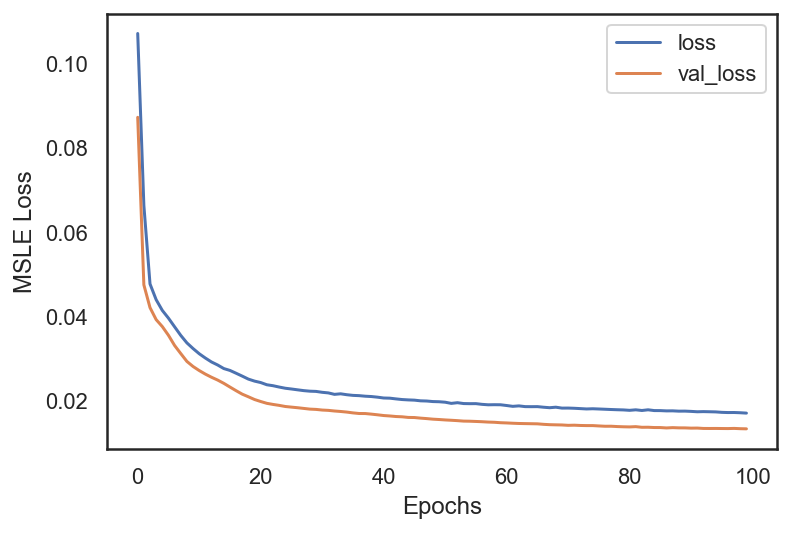

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [35]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.02256911737827394


0.8381211180124224

In [36]:
confusion_matrix(y_test, predictions)

array([[2157,  412],
       [   5,    2]])

In [37]:
pred = model.predict(x_test_scaled)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_test_scaled))
pred = model.predict(features)
score2 = np.sqrt(metrics.mean_squared_error(pred,features))
pred = model.predict(x_attack)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_attack))
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Anormal Data (RMSE): {score3}")

ValueError: in user code:

    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    <ipython-input-11-10a22babf697>:34 call  *
        encoded = self.encoder(inputs)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__  **
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 23 but received input with shape (None, 25)


# mm

In [ ]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("ins_fraud.csv")

In [ ]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    
    data[name] = (df[name] - mean) / sd

In [ ]:
val = data[data["c24"] == 1].drop("c24", 1)
data = data[data["c24"] == 0].drop("c24", 1)

In [ ]:
encode_numeric_zscore(data, "c14")
encode_numeric_zscore(data, "c15")
encode_numeric_zscore(data, "c7")
encode_numeric_zscore(data, "c19")

In [ ]:
data

In [ ]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

In [ ]:
data.drop('fraud',axis=1,inplace=True)


df_normal = data[normal_mask]
df_attack = data[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

In [ ]:
x_normal = df_normal.values
x_attack = df_attack.values

In [ ]:
x_normal = df_normal.values
x_attack = df_attack.values

from sklearn.model_selection import train_test_split 

X_train, X_test = train_test_split(x_normal, test_size=0.2, random_state=13)

In [ ]:
len(X_train), len(X_test)

In [ ]:
def AE():
    ## Encoder 구간
    model = tf.keras.Sequential()
    model.add(Dense(256, input_shape=(56*56,)))  # 입력계층
    model.add(Activation('relu'))      

    model.add(Dense(128))                       # 은닉계층
    model.add(Activation('relu'))

    ## Decoder 구간
    model.add(Dense(128))                        # 은닉계층
    model.add(Activation('relu'))

    model.add(Dense(56*56))                # 출력계층
    model.add(Activation('linear'))

    return model

In [ ]:
# model 함수 실행
model = AE()
model.summary()

In [ ]:
# Training 
# 모델 구조 확정하고 컴파일 진행
model.compile(loss='MSE',                   # MSE : mean square error
              optimizer='adam',                 
              metrics=[ 'mae' ])            # MAE : mean absolute  error  

# model.fit을 써서 학습. 학습과정을 history에 저장
history = model.fit(X_train, X_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, X_test),
                    shuffle=True)

In [ ]:
# Normal data (data_3000)
Nom_data = np.concatenate((X_test, X_train), axis = 0)
Nom_pred = model.predict(Nom_data) # AE 이미지 결과값 
Nom_pred_mse = np.mean(np.power(Nom_data - Nom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Normal Metric')
Nom_pred_mse_df = pd.DataFrame({'Normal_mse':Nom_pred_mse})
print(Nom_pred_mse_df.describe())

print('\n')

# Abnormal data (data_1000)
ANom_pred = model.predict(x_attack) # AE 이미지 결과값 
ANom_pred_mse = np.mean(np.power(x_attack - ANom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Anomaly Metric')
ANom_pred_mse_df = pd.DataFrame({'Anomaly_mse':ANom_pred_mse})
print(ANom_pred_mse_df.describe())

# 히스토그램 그리기
print('\n')
plt.figure()
plt.title('MSE Histogram') # 그림 이름 설정 
plt.hist(Nom_pred_mse, bins=10, facecolor='blue', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.hist(ANom_pred_mse, bins=10, facecolor='red', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.show()

In [ ]:
test_data = np.concatenate((X_test, x_attack), axis = 0)
y_true = np.concatenate((y_test, x_attack), axis = 0)

print(np.shape(test_data))
print(np.shape(y_true))

In [ ]:
# 각 이미지별 loss를 구하여 설정한 임계값으로 조건을 제시한다.
test_data_pred = model.predict(test_data)
all_cost = np.mean(np.power(test_data - test_data_pred, 2), axis=1)

threshold = 0.045  # 설정한 임계값 (선택 가능)

y_pred = [] #y_pred list 초기화
for i in range(len(all_cost)):
    if all_cost[i] > threshold :
        y_pred.insert(i, 0) #임계점보다 높으면 positive(이상)
    else:
        y_pred.insert(i, 1) #임계점보다 낮으면 negative(정상)
        
print(y_pred[0:100]) #프린트로 값을 확인할 수 있다 (확인용으로 100개만).
print(np.shape(y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix #confusion_matrix 라이브러리 임포트

con_mat = confusion_matrix(y_true, y_pred) #confusion_matrix 함수 실행

# Print the confusion matrix as text.
TP = con_mat[0][0] #둘다 Anomal, 0이며 예측값이 positive(이상값)이다.
FN = con_mat[0][1] #실제값과 예측값이 달랐으며, 예측값이 negative(정상값)이다.
FP = con_mat[1][0] #실제값과 예측값이 달랐으며, 예측값이 postive(이상값)이다.
TN = con_mat[1][1] #둘다 nomal, 1이며 예측값이 negative(정상값)이다.
print('\n',
      'TP :', TP, '\n', 
      'FN :', FN, '\n', 
      'FP :', FP, '\n', 
      'TN :', TN, '\n')

Accuracy = (TP+TN)/(TP+FN+FP+TN) #정분류율 : 전체관측치 중 실제값과 예측치가 일치하는 정도
print('Accuracy(정분류율=(TP+TN)/(TP+FN+FP+TN)):', '{:.2%}'.format(Accuracy))

Error_rate = (FP+FN)/(TP+FN+FP+TN) #오분류율 : 전체 관측치 중 실제값과 예측치가 다른 정보 (1-accuracy)
print('Error_rate(오분류율=(FP+FN)/(TP+FN+FP+TN):', '{:.2%}'.format(Error_rate))

Precirion = TP/(TP+FP) #정확도 : TRUE로 예측한 관측치 중 실제값이 TRUE인 정도
print('Precirion(정확도=TP/(TP+FP)):', '{:.2%}'.format(Precirion))

Recall = TP/(TP+FN) #재현율 : 실제값이 TRUE인 관측치 중 예측치가 적중한 정도, 모형의 완정성을 평가함, 민감도
print('Recall(재현율,민감도=TP/(TP+FN)):', '{:.2%}'.format(Recall))

print('\n')
# Confusion Matrix 표 그리기
plt.imshow(con_mat, interpolation='nearest', cmap=plt.cm.Blues)

# Plot 구성하기
plt.title('Confusion Matrix', fontsize=20) # Plot 이름
plt.tight_layout()
plt.colorbar()
label=["Anomal(0)", "Nomal(1)"] # 라벨값
tick_marks = np.arange(len(label)) 
plt.xticks(tick_marks, label)
plt.yticks(tick_marks, label)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)

# 표 안에 숫자 기입하는 방법
name = [['TP','FN'], ['FP', 'TN']]
thresh = con_mat.max() / 2.
for i in range(2):
     for j in range(2):
        plt.text(j, i, str(name[i][j])+" = "+str(con_mat[i, j]),
                 horizontalalignment="center",
                 color="white" if con_mat[i, j] > thresh else "black",
                 fontsize=16)
    
plt.show()

# CLUSTERING 해보자 

In [ ]:
data = pd.read_csv("ins_fraud.csv")

In [ ]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    
    data[name] = (df[name] - mean) / sd

In [ ]:
val = data[data["c24"] == 1].drop("c24", 1)
data = data[data["c24"] == 0].drop("c24", 1)

In [ ]:
encode_numeric_zscore(data, "c14")
encode_numeric_zscore(data, "c15")
encode_numeric_zscore(data, "c7")
encode_numeric_zscore(data, "c19")

In [ ]:
data

In [ ]:
y = data["fraud"]

In [ ]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

In [ ]:
data.drop('fraud',axis=1,inplace=True)


df_normal = data[normal_mask]
df_attack = data[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

In [ ]:
x_normal = df_normal.values
x_attack = df_attack.values

In [ ]:
X_train, X_test = train_test_split(X_normal, test_size = 0.2, random_state = 13)
y_train, y_test  = train_test_split(y, test_size = 0.2, random_state = 13)

In [ ]:
model = Sequential()
model.add(Dense(25, input_dim=x_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to

model.add(Dense(25, activation='relu'))
model.add(Dense(x_normal.shape[1])) # Multiple output neurons

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.fit(X_train, X_train, epochs=100, batch_size=256)

In [ ]:
# 잠재 변수 벡터 확보 
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(X_train)
print(latent_vector.shape)
print(latent_vector[0])

In [ ]:
%%time 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=13)
kmeans.fit(latent_vector)

In [ ]:
# 군집 결과 
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

In [ ]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=13)
tsne_vector = tsne.fit_transform(latent_vector[:621])

cmap = plt.get_cmap('rainbow', 2)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=y_train[:621], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters-1) / n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

In [ ]:
# 최근접이웃의 숫자 perplexities tuning 
perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize=(8, 12))

for c in range(6):
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector[:621])
    
    plt.subplot(3, 2, c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=y_train[:621], cmap='rainbow')
    plt.title('perplexity: {0}'.format(perplexities[c]))
plt.show()

In [ ]:
# 원 데아터가 있으면 clustering이라는 컬럼을 만들어서 번호를 붙여주고 fraud데이터ㄴ에 어떤 번호가 붙어있는지 확인 
# 예제 찾아보거나 노력... 


# SMOTE를 쓴 다음 AUTOENCODER 

In [ ]:
data = pd.read_csv("ins_fraud.csv")

In [ ]:
val = data[data["c24"] == 1].drop("c24", 1)
data = data[data["c24"] == 0].drop("c24", 1)

In [ ]:
data

In [ ]:
X = data.drop("fraud", 1)
y = data[["fraud"]]

In [ ]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42)
X_sme, y_sme  = sme.fit_resample(X, y)

In [ ]:
len(X_sme), len(y_sme)

In [ ]:
data = pd.concat([X_sme, y_sme], 1)

In [ ]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    
    data[name] = (df[name] - mean) / sd

In [ ]:
encode_numeric_zscore(data, "c14")
encode_numeric_zscore(data, "c15")
encode_numeric_zscore(data, "c7")
encode_numeric_zscore(data, "c19")

In [ ]:
data

In [ ]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

data.drop('fraud',axis=1,inplace=True)


df_normal = data[normal_mask]
df_attack = data[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

In [ ]:
# Convert DataFrame into Numpy arrays, keras need numpy
x_normal = df_normal.values
x_attack = df_attack.values

In [ ]:
df_normal = x_normal
df_attack = x_attack

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

In [ ]:
from sklearn.model_selection import train_test_split 

x_normal_train, x_normal_test = train_test_split(x_normal, test_size=0.2, random_state=13)

In [ ]:
print(f"Normal train count: {len(x_normal_train)}")
print(f"Normal test count: {len(x_normal_test)}")

In [ ]:
model = Sequential()
model.add(Dense(25, input_dim=x_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to

model.add(Dense(25, activation='relu'))
model.add(Dense(x_normal.shape[1])) # Multiple output neurons

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=100)

In [ ]:
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
    ㄴㅇㄱ 
    ㄴㅇㄱ 
    ㄴㅇㄱ
    ㄴㅇㄱ
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded


In [ ]:
model = AutoEncoder(output_units=x_normal_train.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_normal_train,
    x_normal_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_attack, x_attack)
)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
pred = model.predict(x_normal_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_normal_test))
pred = model.predict(x_normal)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_normal))
pred = model.predict(x_attack)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_attack))
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Anormal Data (RMSE): {score3}")